In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
import urllib.request

In [2]:
%matplotlib inline

In [3]:
open('USW00022536.dly','r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [4]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [5]:
def parsefile(filename):
    return np.genfromtxt(filename,
                        delimiter = dly_delimiter,
                        usecols = dly_usecols,
                        dtype = dly_dtype,
                        names = dly_names)

In [6]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32] *31
dly_names = ['year', 'month', 'obs'] + [str(day) for day in range(1,31+1)] 

In [7]:
lihue = parsefile('USW00022536.dly')
lihue

array([(1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9,

In [8]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate, startdate + np.timedelta64(1,'M'), np.timedelta64(1,'D'))
    rows = [(date, record[str(i+1)]/10) for i, date in enumerate(dates)]
    return np.array(rows, dtype=[('date','M8[D]'),('value','d')])

In [9]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [10]:
def getobs(filename,obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [11]:
getobs('USW00022536.dly','TMIN')

array([('1950-02-01',   17.8), ('1950-02-02',   15.6),
       ('1950-02-03',   16.1), ..., ('2015-09-28', -999.9),
       ('2015-09-29', -999.9), ('2015-09-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [12]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_train = getobs('USW00022536.dly','TMIN')

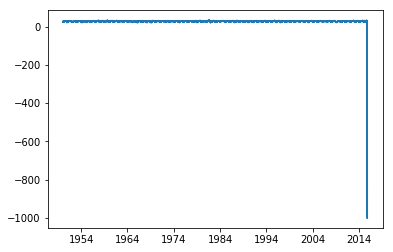

In [13]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])

In [18]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    data['value'][data['value'] == -999.9] = np.nan
    return data

In [25]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

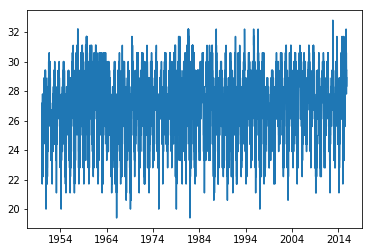

In [26]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])

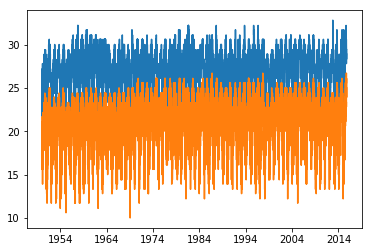

In [29]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
pp.plot(lihue_tmin['date'],lihue_tmin['value'])

In [33]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(nan, nan)

[0, 8, 0, 12]

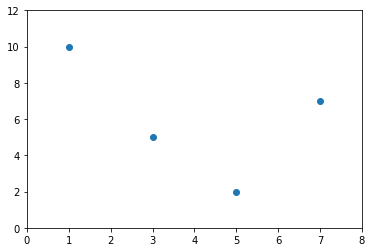

In [35]:
x = np.array([1,3,5,7],'d')
y = np.array([10,5,2,7],'d')

pp.plot(x,y,'o')
pp.axis([0,8,0,12])

In [36]:
xs = np.linspace(1,7)

In [37]:
ys = np.interp(xs,x,y)

[0, 8, 0, 12]

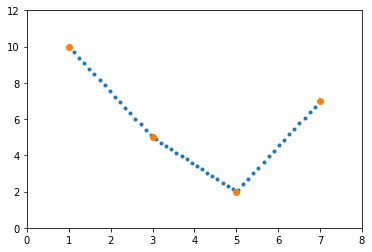

In [46]:
pp.plot(xs, ys,'.')
pp.plot(x,y,'o')
pp.axis([0,8,0,12])

In [70]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    nan = np.isnan(data['value'])   
    data['value'][nan] = np.interp(dates_float[nan], dates_float[~nan], data['value'][~nan])

In [71]:
fillnans(lihue_tmax)
fillnans(lihue_tmin)

In [74]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(21.051530250594173, 27.300908977192176)